<a href="https://colab.research.google.com/github/rtiwari6-stats/fraud-classifier/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#data exploration for fraud detection

#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraud-full.csv")

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0.00,0.00
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1.00,0.00
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0.00,0.00


In [65]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"2,547,271.00","2,547,270.00","2,547,270.00","2,547,270.00","2,547,270.00","2,547,270.00","2,547,270.00","2,547,270.00"
mean,107.54,"158,595.70","853,231.26","874,731.19","996,106.40","1,107,081.51",0.00,0.00
std,70.67,"264,907.78","2,935,392.89","2,971,742.27","2,301,414.26","2,387,002.36",0.03,0.00
min,1.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,35.00,"12,671.69",0.00,0.00,0.00,0.00,0.00,0.00
50%,135.00,"77,481.20","14,851.00",0.00,"139,244.48","227,670.20",0.00,0.00
75%,166.00,"213,911.89","116,930.32","158,106.80","948,210.24","1,139,874.27",0.00,0.00
max,206.00,"10,000,000.00","38,939,424.03","38,946,233.02","42,283,775.08","42,655,769.20",1.00,0.00


In [66]:

data.isnull().sum()


step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

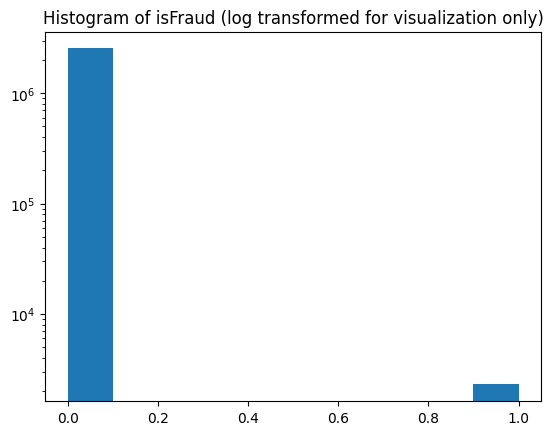

In [67]:
plt.yscale('log')
plt.hist(data["isFraud"])
plt.title("Histogram of isFraud (log transformed for visualization only)")
plt.show()

In [68]:
data['isFraud'].value_counts()


0.00    2544972
1.00       2298
Name: isFraud, dtype: int64

In [69]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0.00
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1.00
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0.00


In [70]:
# we have an unbalanced dataset so we use stratified sampling to ensure same distribution of
#fradulent transactions in training and test
#train-test split is 0.7:0.3

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
data=data.dropna()
for train_index, test_index in split.split(data, data["isFraud"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X = strat_train_set.drop("isFraud", axis=1)
y = strat_train_set["isFraud"].copy()

X_test = strat_test_set.drop("isFraud", axis=1)
y_test = strat_test_set["isFraud"].copy()

# from sklearn.model_selection import train_test_split

# # Select the first 10 columns of our DataFrame that we will use as the predictors in our models
# x = data.iloc[:,:9]

# # Select the response column
# y = data.isFraud

# # Split these data into training and testing datasets
# X, X_test, y, y_test = train_test_split(x,y, random_state=123)



In [71]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
550955,21,PAYMENT,"3,219.94",C1466110020,"12,903.73","9,683.79",M663613460,0.00,0.00
2076536,182,CASH_OUT,"200,442.78",C535075724,"872,838.11","672,395.33",C1812040076,"202,568.21","403,010.99"
1480196,141,PAYMENT,"9,365.18",C1125756846,"197,862.62","188,497.44",M602888425,0.00,0.00
157148,12,CASH_IN,"171,135.37",C1180555612,"6,596.00","177,731.37",C1514884249,"11,338,272.54","11,036,007.55"
1865508,164,CASH_OUT,"125,617.35",C1862454839,0.00,0.00,C1195724292,"1,127,520.18","1,253,137.53"


In [72]:
y.head()

550955    0.00
2076536   0.00
1480196   0.00
157148    0.00
1865508   0.00
Name: isFraud, dtype: float64

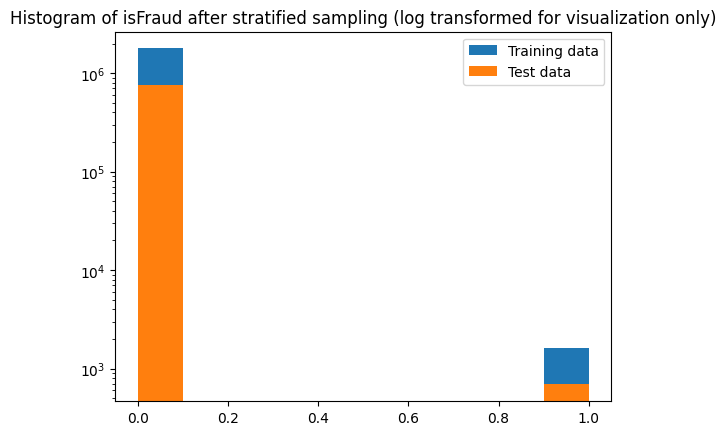

In [73]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.hist(strat_train_set["isFraud"], label="Training data")
plt.hist(strat_test_set["isFraud"], label="Test data")
plt.title("Histogram of isFraud after stratified sampling (log transformed for visualization only)")
plt.legend()
plt.show()

In [74]:
X.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [75]:
X['type'].value_counts()

CASH_OUT    635414
PAYMENT     595395
CASH_IN     393027
TRANSFER    147818
DEBIT        11435
Name: type, dtype: int64

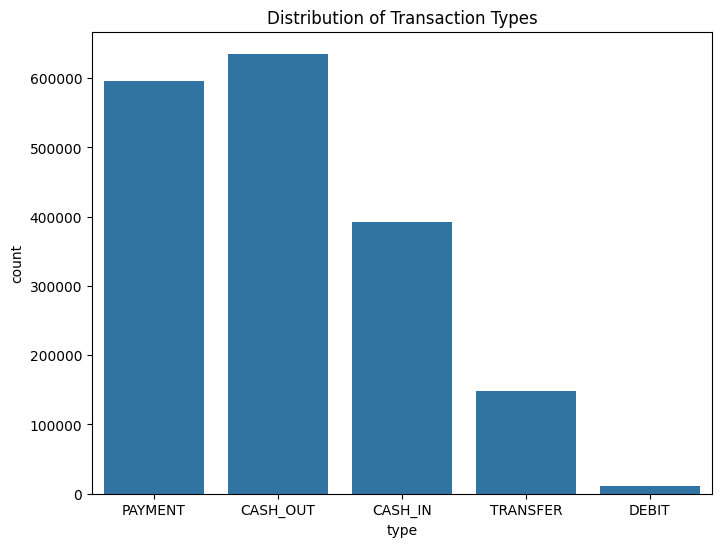

In [76]:
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.countplot(x='type', data=X)
plt.title('Distribution of Transaction Types')
plt.show()

In [77]:
print(data[['type','isFraud']].value_counts())


type      isFraud
CASH_OUT  0.00       906659
PAYMENT   0.00       850561
CASH_IN   0.00       561343
TRANSFER  0.00       210029
DEBIT     0.00        16380
CASH_OUT  1.00         1157
TRANSFER  1.00         1141
dtype: int64


type
CASH_OUT    821
TRANSFER    788
dtype: int64


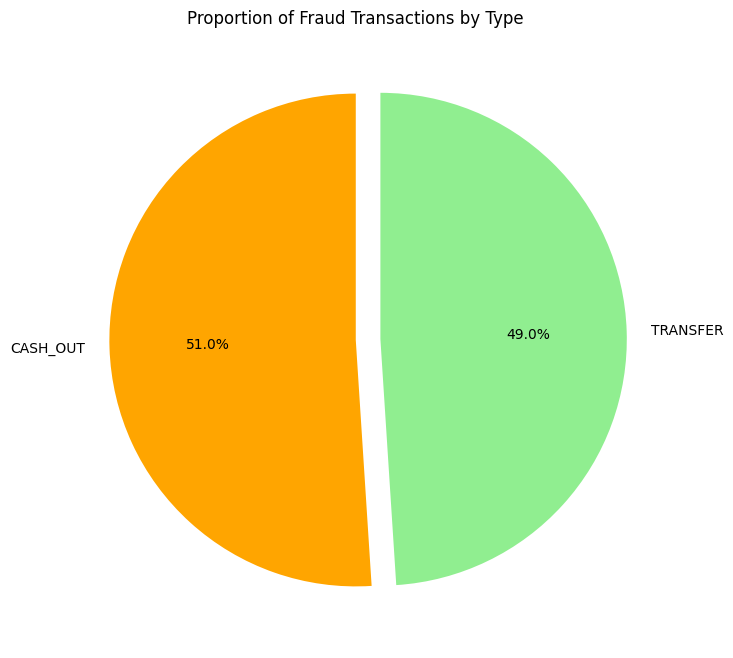

In [78]:
fraud_transactions = X[y == 1]
fraud_counts_by_type = fraud_transactions.groupby('type').size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

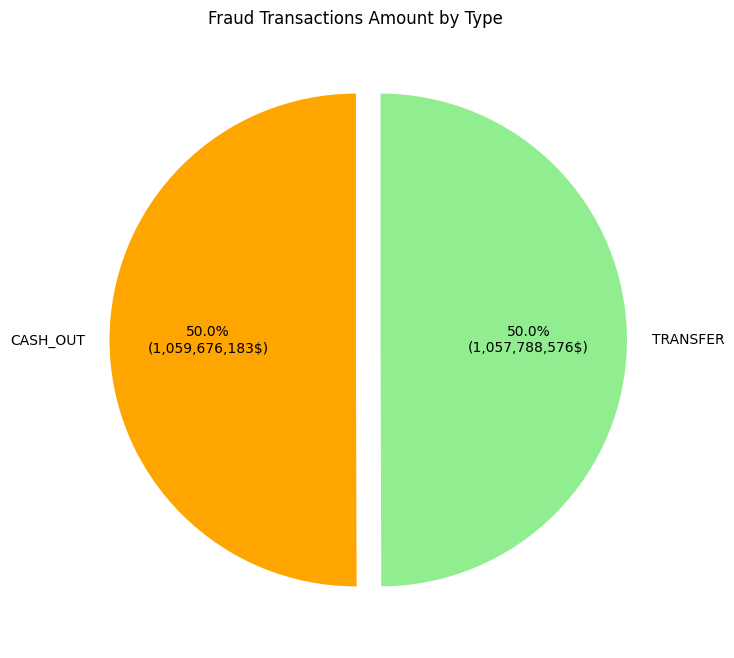

In [79]:
fraud_amounts_by_type = X[y == 1].groupby("type")["amount"].sum()
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts_by_type, labels=fraud_amounts_by_type.index,
        autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Fraud Transactions Amount by Type')
plt.show()

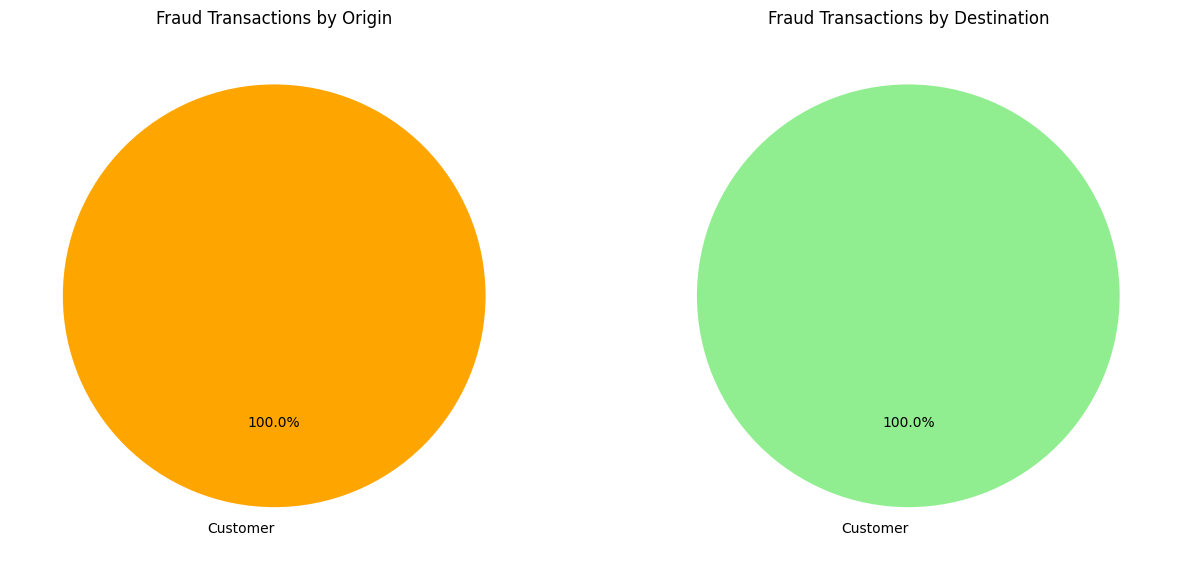

In [80]:
fraud_transactions = X[y == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['orange'])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['lightgreen'])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

In [81]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics about amounts for non-fraud transactions:\n",
      pd.DataFrame.describe(X[y == 0].amount), "\n")
print("Statistics about amounts for fraud transactions:\n",
      pd.DataFrame.describe(X[y == 1].amount), "\n")

Statistics about amounts for non-fraud transactions:
 count   1,781,480.00
mean      157,498.39
std       255,297.86
min             0.02
25%        12,672.96
50%        77,240.15
75%       213,485.91
max     7,719,103.29
Name: amount, dtype: float64 

Statistics about amounts for fraud transactions:
 count        1,609.00
mean     1,316,012.90
std      2,119,379.32
min            119.00
25%        115,461.48
50%        417,217.89
75%      1,494,831.65
max     10,000,000.00
Name: amount, dtype: float64 



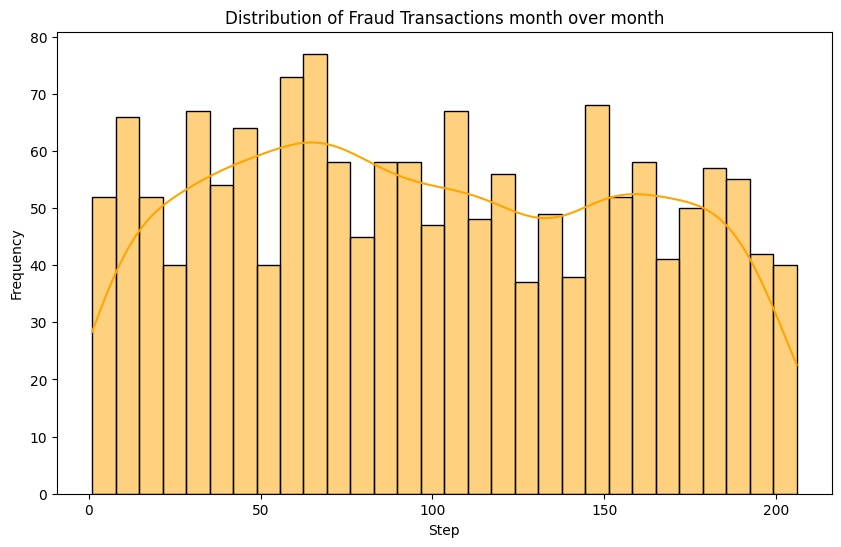

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions["step"], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Fraud Transactions month over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

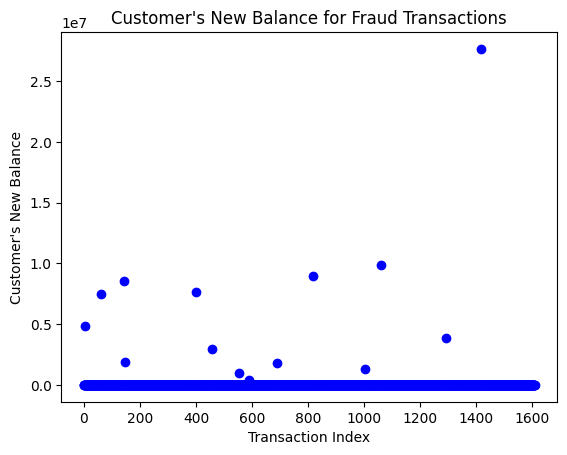

In [83]:
plt.scatter(range(len(fraud_transactions)), fraud_transactions['newbalanceOrig'], color='blue')
plt.title('Customer\'s New Balance for Fraud Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Customer\'s New Balance')
plt.show()

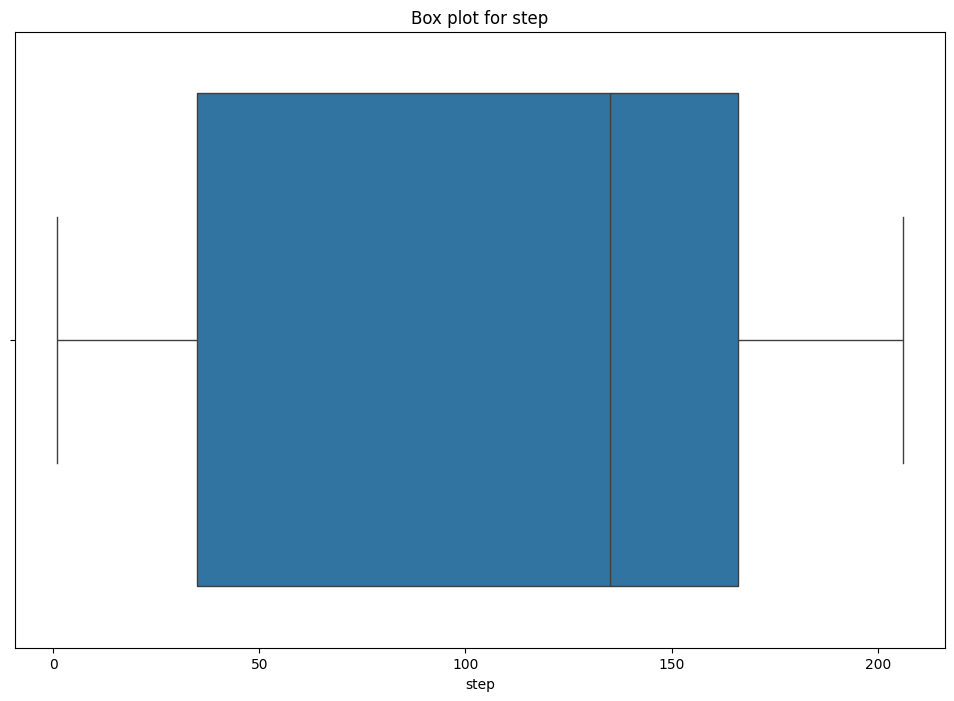

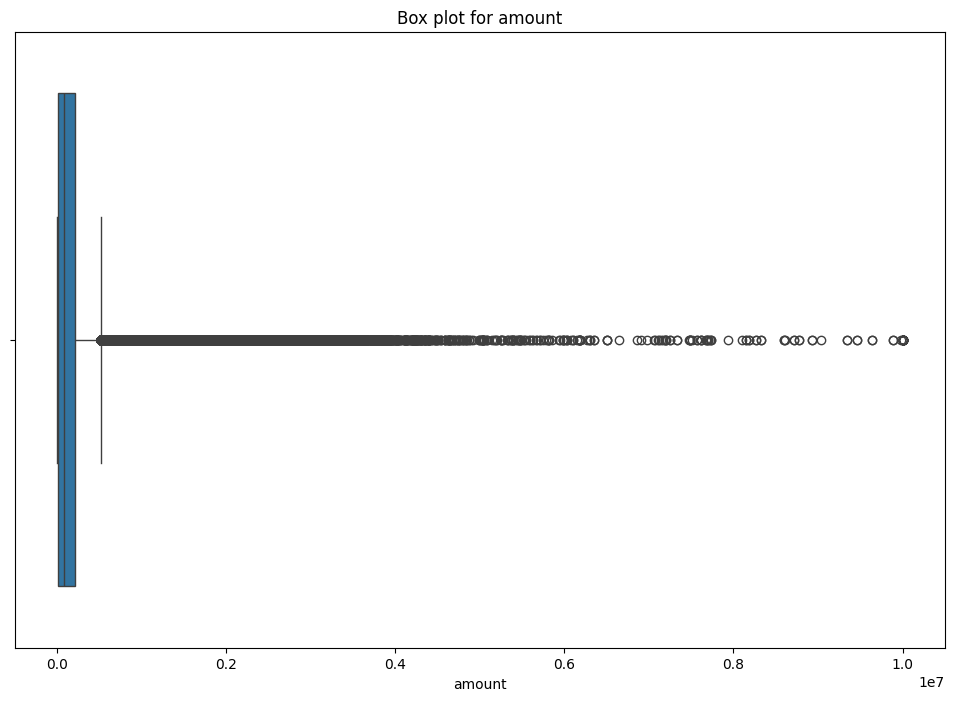

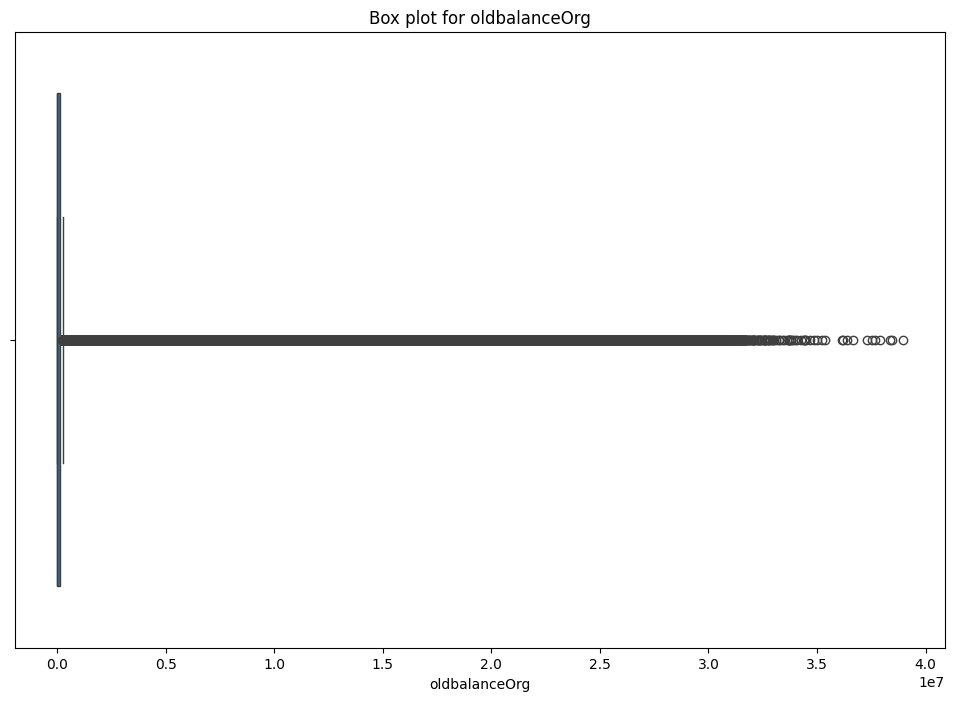

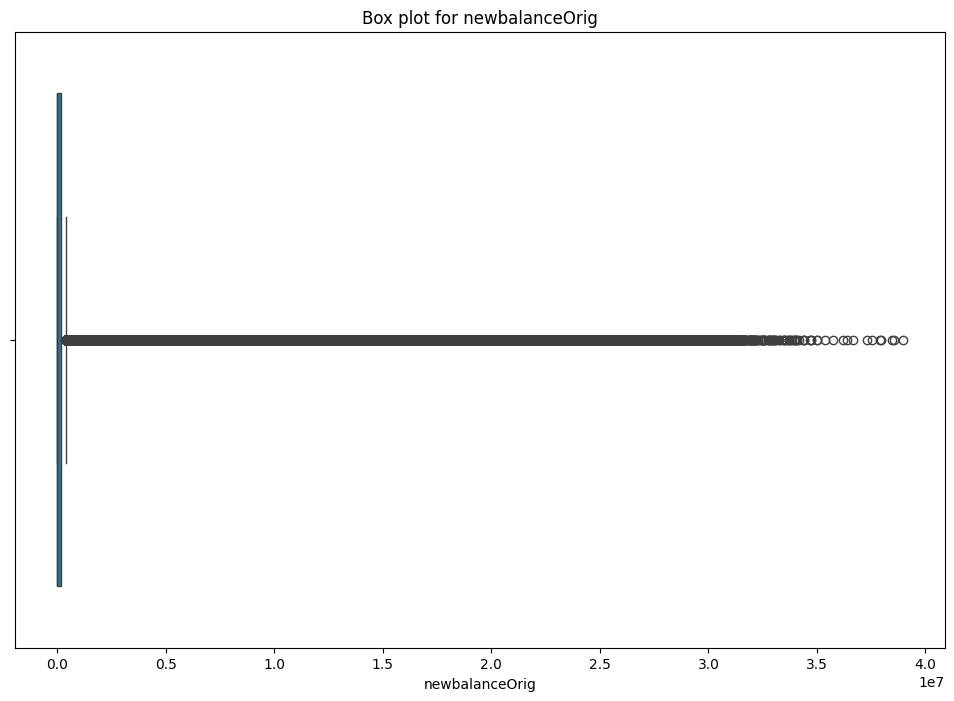

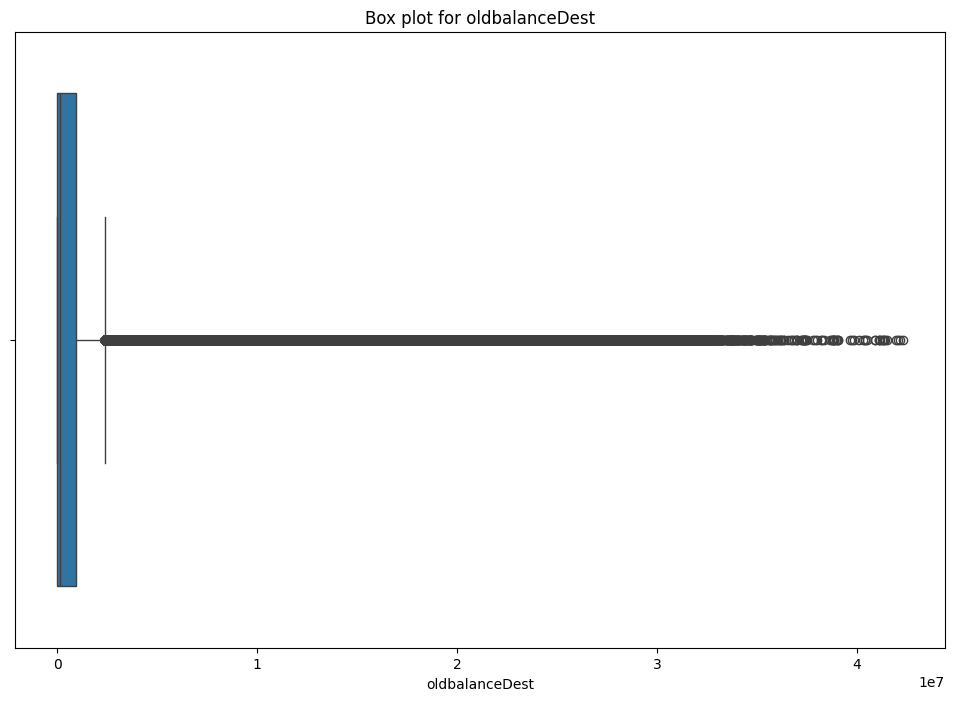

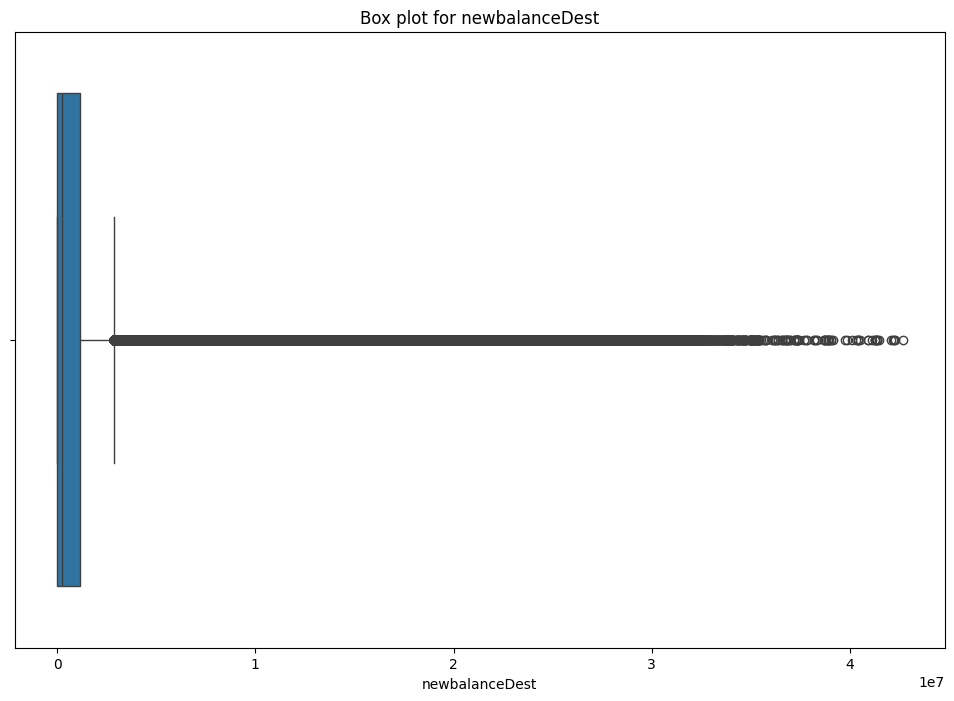

In [84]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=(X[column]))
    plt.title(f'Box plot for {column}')
    plt.show()

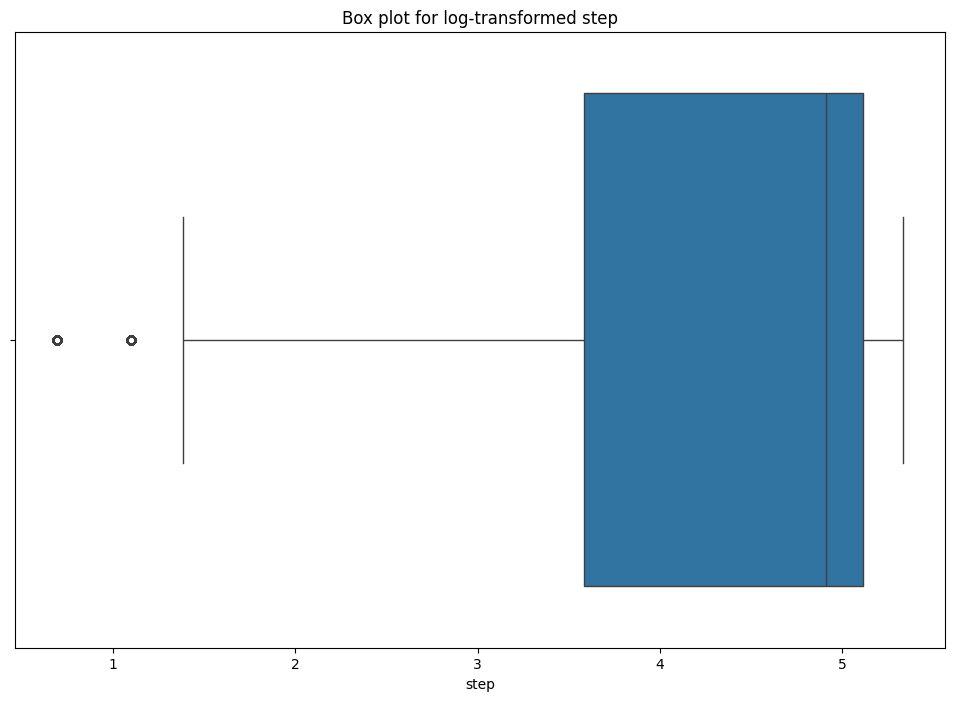

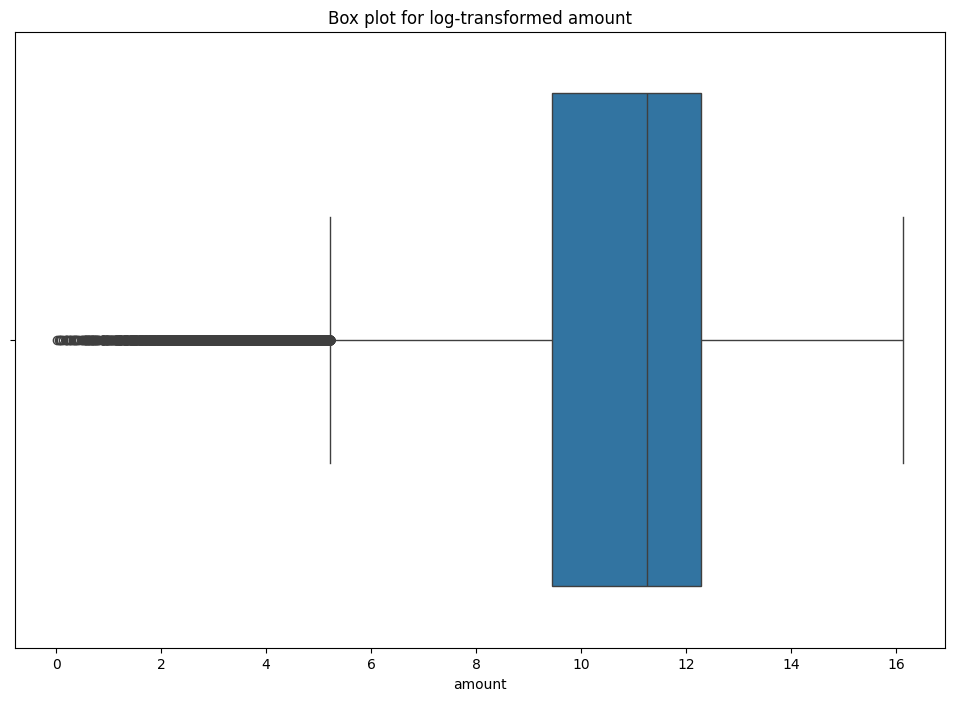

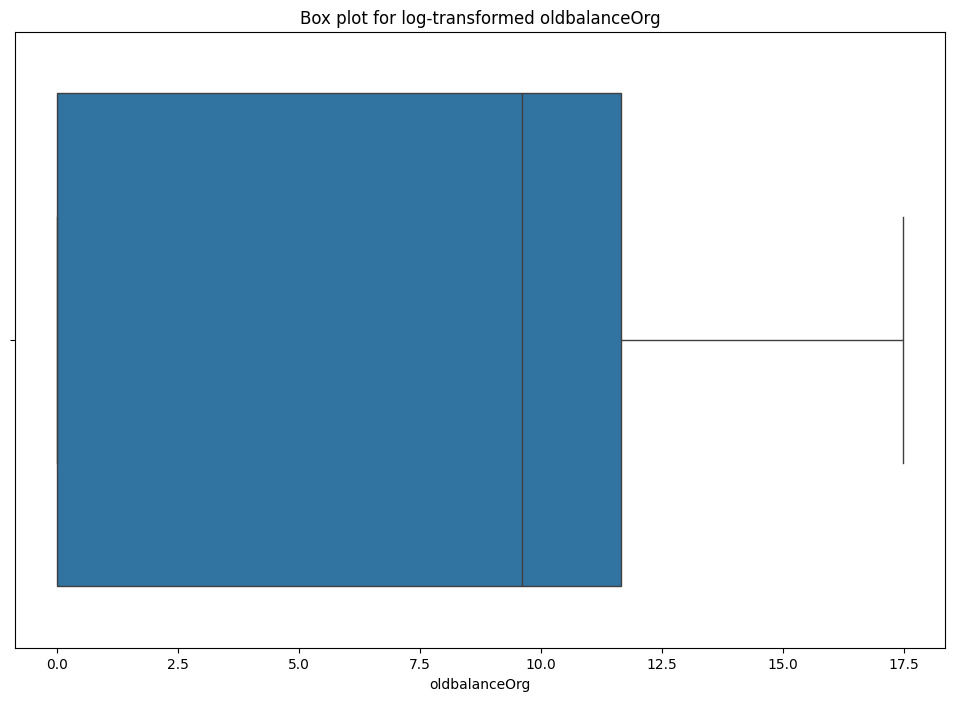

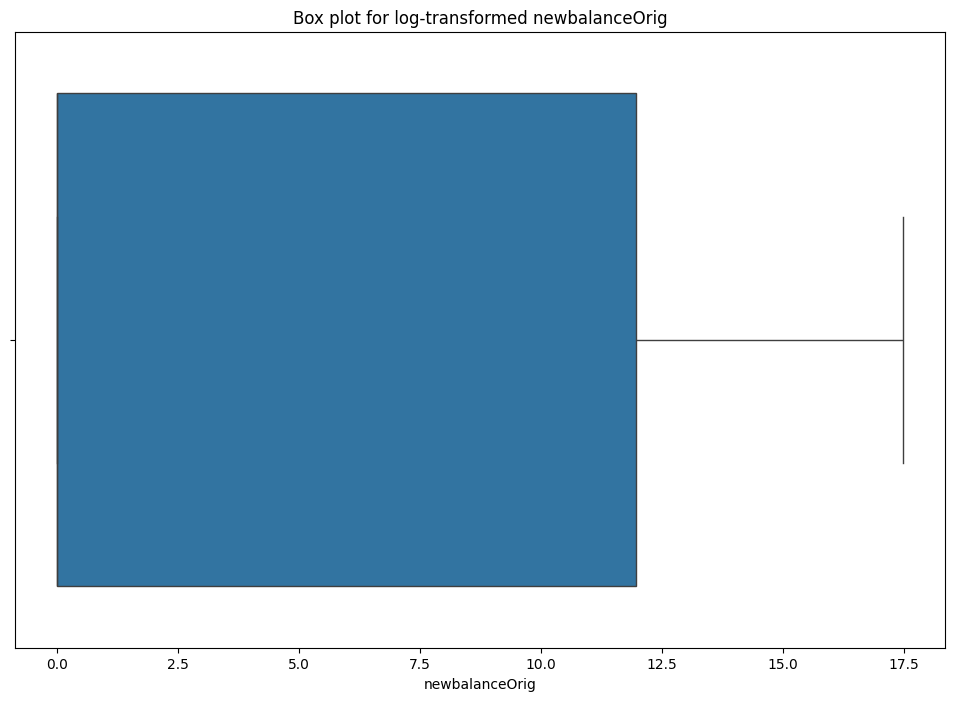

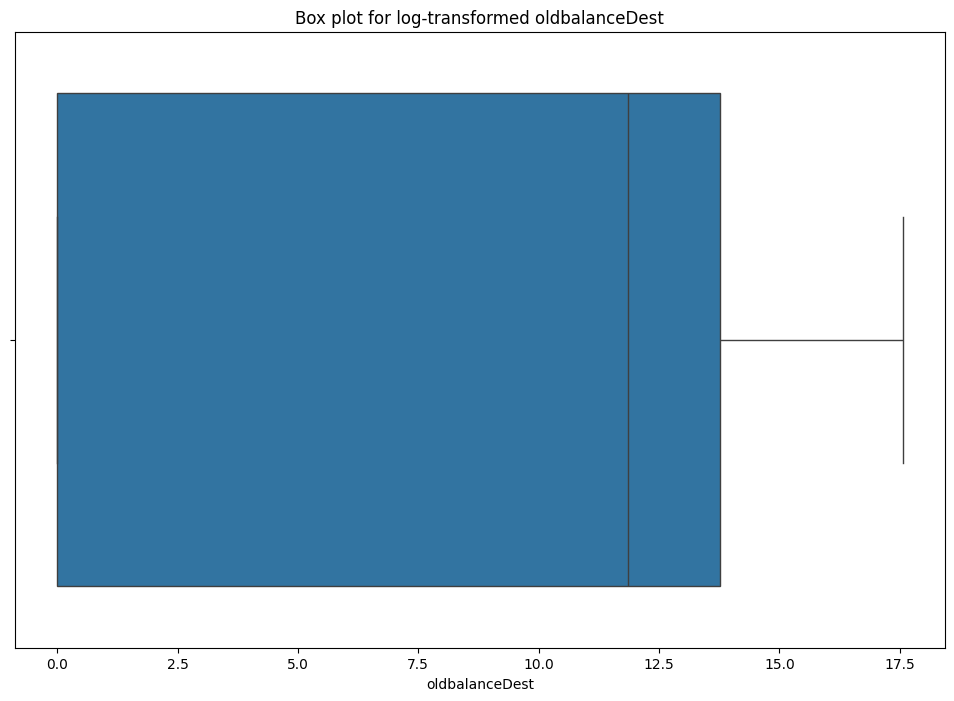

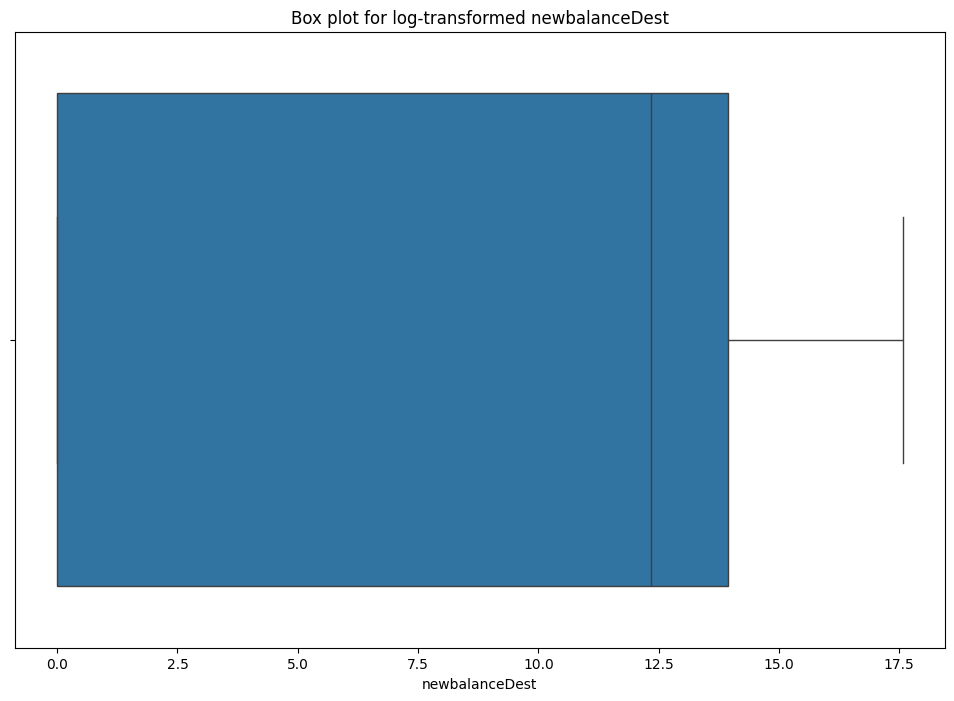

In [85]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=np.log1p(X[column]))  # Applying log transformation
    plt.title(f'Box plot for log-transformed {column}')
    plt.show()

In [93]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder


standard_scalar = StandardScaler()
X[numeric_columns] = standard_scalar.fit_transform(X[numeric_columns])

label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])


In [94]:
X['isCustomerOrig'] = X['nameOrig'].str[0] == 'C'
X['isCustomerDest'] = X['nameDest'].str[0] == 'C'

X["isCustomerOrig"] = X["isCustomerOrig"].astype(int)
X["isCustomerDest"] = X["isCustomerDest"].astype(int)


X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
550955,-1.22,3,-0.59,C1466110020,-0.29,-0.29,M663613460,-0.43,-0.46,1,0
2076536,1.05,1,0.16,C535075724,0.01,-0.07,C1812040076,-0.34,-0.30,1,1
1480196,0.47,3,-0.56,C1125756846,-0.22,-0.23,M602888425,-0.43,-0.46,1,0
157148,-1.35,0,0.05,C1180555612,-0.29,-0.23,C1514884249,4.49,4.16,1,1
1865508,0.80,1,-0.12,C1862454839,-0.29,-0.29,C1195724292,0.06,0.06,1,1


In [95]:
X[X["isCustomerDest"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
550955,-1.22,3,-0.59,C1466110020,-0.29,-0.29,M663613460,-0.43,-0.46,1,0
1480196,0.47,3,-0.56,C1125756846,-0.22,-0.23,M602888425,-0.43,-0.46,1,0
42694,-1.39,3,-0.55,C1517881637,-0.27,-0.28,M1399334195,-0.43,-0.46,1,0
1341210,0.42,3,-0.47,C128448278,-0.20,-0.22,M915896775,-0.43,-0.46,1,0
1281868,0.39,3,-0.45,C809803264,-0.27,-0.29,M1931284052,-0.43,-0.46,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2388975,1.32,3,-0.56,C1909653169,-0.29,-0.29,M357784196,-0.43,-0.46,1,0
1269739,0.39,3,-0.57,C278597507,-0.29,-0.29,M1273063428,-0.43,-0.46,1,0
1504983,0.50,3,-0.59,C1598246219,-0.20,-0.20,M1349901961,-0.43,-0.46,1,0
873708,-0.93,3,-0.56,C2031522308,-0.29,-0.29,M2070486802,-0.43,-0.46,1,0


In [96]:
X[X["isCustomerOrig"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest


In [103]:
import statsmodels.api as sm


X_formula = X.loc[:, ['step', 'type', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]

glm_mod_1 = sm.Logit(y, X_formula).fit()
print(glm_mod_1.summary())

#we have a problem with quasi seperation because of type.


Optimization terminated successfully.
         Current function value: 0.030246
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1783089
Model:                          Logit   Df Residuals:                  1783082
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  -3.185
Time:                        04:02:24   Log-Likelihood:                -53931.
converged:                       True   LL-Null:                       -12888.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0004      0.008     -0.045      0.964      -0.017       0.016
type            

In [104]:
import statsmodels.api as sm


X_formula = X.loc[:, ['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]

glm_mod_1 = sm.Logit(y, X_formula).fit()
print(glm_mod_1.summary())

#Quasi-separation gone. Step is insignificant. So we remove Step.

Optimization terminated successfully.
         Current function value: 0.692883
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1783089
Model:                          Logit   Df Residuals:                  1783083
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  -94.86
Time:                        04:03:10   Log-Likelihood:            -1.2355e+06
converged:                       True   LL-Null:                       -12888.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0014      0.002     -0.901      0.367      -0.004       0.002
amount           

In [105]:
import statsmodels.api as sm


X_formula = X.loc[:, ['amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]

glm_mod_1 = sm.Logit(y, X_formula).fit()
print(glm_mod_1.summary())

#everything is significant.
#use this model for roc-auc.


Optimization terminated successfully.
         Current function value: 0.692883
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1783089
Model:                          Logit   Df Residuals:                  1783084
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  -94.86
Time:                        04:03:49   Log-Likelihood:            -1.2355e+06
converged:                       True   LL-Null:                       -12888.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
amount             0.0321      0.002     15.162      0.000       0.028       0.036
oldbalanceOrg    

Area under the ROC curve for training set : 0.926013
Optimal threshold is [0.5045245373892079]
Average error on training set is  0.15364852791980657


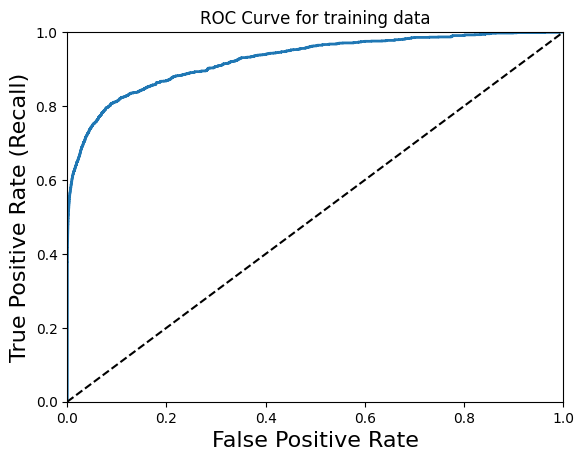

In [137]:
from sklearn.metrics import roc_curve, auc
import pylab as pl

pred_X = glm_mod_1.predict(X_formula)
fpr, tpr, threshold =roc_curve(y, pred_X)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve for training set : %f" % roc_auc)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.title("ROC Curve for training data")

#optimal threshold
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

threshold = list(roc_t['threshold'])
print('Optimal threshold is', threshold)

# Print confusion Matrix
pred_X = [1 if prob > threshold[0] else 0 for prob in pred_X]
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred_X)

#rmse
print("Average error on training set is ", np.mean(y != pred_X))